In [1]:
#Since we're dealing with some pretty complex 3D plots in this 
#   exercise, it's helpful to be able rotate the plots around. 
#   This line is what's know as a "magic function" and will change
#   the backend matplotlib is using from the default "inline"
#   (which uses inline plots) to a different version that allows
#   you to interact with the plots.
#Unfortunately, the interactive backend is far slower than inline.
#   When you're done looking at the 3D plot, hit the power button
#   in the top right corner of the plot to freeze it and keep your
#   computer from slowing down too much.
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
#/
#Just because I find this useful
from tqdm import trange
import warnings
warnings.filterwarnings("ignore")
#/

# Computational Exercise 9: The Biot-Savart Law

You saw at the beginning of this course that you can use python to help visualize the electric field. It should be no surprise by this point, that you can do the same thing  with magnetic fields. 

The Biot-Savart law is given in Griffiths as:
$$
\textbf{B}(\textbf{r}) = \frac{\mu_0}{4\pi} 
\int \frac{\textbf{I} \times \mathscr{\hat r}}{\mathscr{r}^2} dl'=
\frac{\mu_0}{4\pi} I
\int \frac{d\textbf{l}' \times \mathscr{\hat r}}{\mathscr{r}^2}
$$


This means that, while we'll be working with similar functions to the exercise on visualizing the electric field, we'll need to work with vector math (as we saw in the path integral exercise), and in 3D!

## Part a: Function for Biot-Savart

To start, let's make a function that takes in the points in our wire, the current, and the point of interest and finds the magnetic field vector at that point. You'll find it's much, much easier to use vector math (treating your dl and point of interest as vectors). If you need a brush up, it might help to look at the path integral exercise, or the documentation for [np.add](https://numpy.org/doc/stable/reference/generated/numpy.add.html), [np.subtract](https://numpy.org/doc/stable/reference/generated/numpy.subtract.html), [np.cross](https://numpy.org/doc/stable/reference/generated/numpy.cross.html), and [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html). 

Some tips/hints:
- Remember that you can make take the above equation and rather than truly integrate, sum for each dl, which will be a segment of your overall line
- $\mathscr{\hat r} = \frac{\mathscr{r}}{\lvert\lvert{\mathscr{r}}\rvert\rvert}$ 
- If you write this in a generalized way, it should work for any set of points $l$

In [2]:
def biotSavart(l, I, pt):
    #l is the set of points in our wire, I is the current in the wire
    #   and pt is the point of interest that we're calculating at
    
    mu = 1.26 * 10**(-6) #Magnetic constant 
    B = 0

#In this loop, sum up B by calculating and adding the magnetic field generated by each element along the length of the wire
    for m in range(len(l)-1):
        dl = 0 #Modify this line to calculate the length between two points on the wire
        r = 0 #Modify this line to calculate the distance between a particular point on the wire and the location pt
        
    #/
        dl =  np.subtract(l[m+1], l[m])
        r = np.subtract(pt, l[m])
        b = mu/(4*np.pi) * I * np.cross(dl, r) / np.linalg.norm(r)**3
        B = np.add(B, b)

    #/
    return B

## Part b: Calculate the Magnetic Field For An Infinite, Straight Wire

Let's start with something simple, and find the magnetic field from a straight wire. 

Your function from part a will find the magnetic field vector at any given point. Below, use that and iterate through all of the points in the grid to get a full view of the magnetic field. The setup of the meshgrid is given.

Please output a 3D quiver plot to show the vector field as well as a streamplot of a flat plane in the XY direction. If you need a refresher on those plots, you may want to look at the exercise on visualizing the electric field, or see the documentation for [plt.quiver](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.quiver.html) (the documentation doesn't mention that it works in 3D, but it still works. See an example [here](https://matplotlib.org/3.3.1/gallery/mplot3d/quiver3d.html)) and [plt.streamplot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.streamplot.html). 

Some tips/hints:
- Remember that you can use matrix indexing to find the coordinates in a meshgrid. For example, if you're looking for the coordinates of element (3, 4, 5), that would be (X[3, 4, 5], Y[3, 4, 5], Z[3, 4, 5])
- On the quiver plot, you can plot the shape you're ploting with a  <code>ax.plot(l[:, 0], l[:, 1], l[:, 2])</code> , which unpacks the 
- To get the "slice" of the field for the field line plot, you can just use your full magnetic field array and look at all the values with a specific index on the z. The format for this would be <code>bx[:, :, index]</code>
- If you turn the code for getting all of the magnetic field vectors into a simple function, it'll clean up you code later by quite a bit. In fact, you can turn most of your code into functions, since most of it will stay the same each time.
- Mapping the colors to the vectors correctly is a pain, as the normal colormapping attribute isn't implemented for 3D. I've included code that will take in each vector component array and output a list of the colors. You can call this in the form <code>ax.quiver(X, Y, Z, bx, by, bz, color=col, normalize=True)</code>. You need to use <code>normalize=True</code> to make these 3D plots function.
- You may notice two issues in the code, one with the colors and one with the directionality of the arrows in the streamplot. If you have these same issues, no need to worry. If you fix either of these issues, let us know!
    - Since the coloring isn't fully implemented, the heads of the arrows don't get colored the same way as the bodies, so the colors will look -and be- a little off
    - The arrows in the streamplot are backwards when I do them, and I have no idea why

 45%|████▌     | 5/11 [00:00<00:00, 10.82it/s]<ipython-input-2-2d5e0fab9c86>:12: RuntimeWarning: invalid value encountered in true_divide
  b = mu/(4*np.pi) * I * np.cross(dl, r) / np.linalg.norm(r)**3
100%|██████████| 11/11 [00:01<00:00, 10.94it/s]


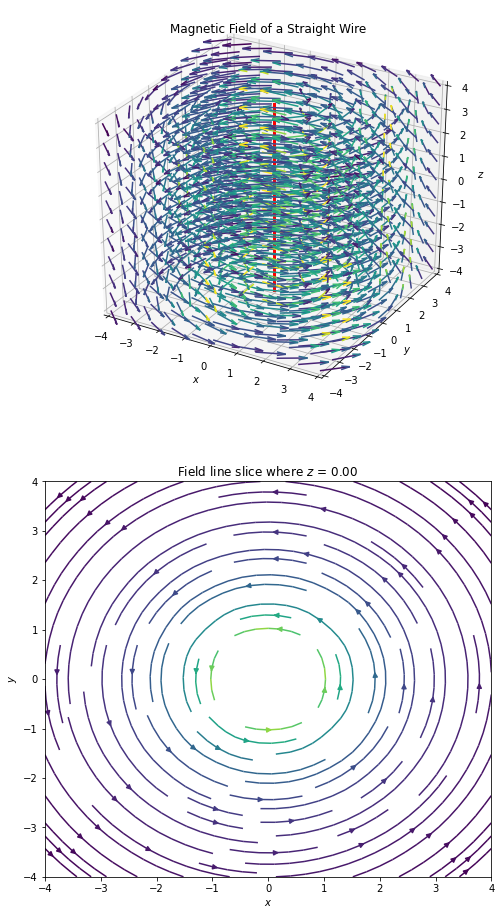

In [3]:
#Set up meshgrid
res = 11
lims = (-4, 4)
x = np.linspace(*lims, res)
y = np.linspace(*lims, res)
z = np.linspace(*lims, res)

X, Y, Z = np.meshgrid(x, y, z)

def get_colors(bx, by, bz, c='viridis'):
    bxflat = bx.flatten()
    byflat = by.flatten()
    bzflat = bz.flatten()
    col = np.array([np.linalg.norm((bxflat[i], byflat[i], bzflat[i])) for i in range(len(bxflat))])

    minima = np.nanmin(col[np.nonzero(col)])
    maxima = np.nanmax(col)

    norm = colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=c)
    
    return [mapper.to_rgba(v) for v in col]

# Function to iternate through volume calculating the magnetic field vector at each location
def fullMagneticField(l, I, res):
    bx = np.zeros((res, res, res)) #x-components of the magnetic field
    by = np.zeros((res, res, res)) #y-components of the magnetic field
    bz = np.zeros((res, res, res)) #z-components of the magnetic field
    for i in trange(res):
        for j in range(res):
            for k in range(res):
                #Modify this part of the loop to include a calculation of the magnetic field at a particular point.
    return bx, by, bz

I = 1 #Current in Wire
l = 0 #Modify this variable to be an array of positions for the wire

bx, by, bz = fullMagneticField(l, I, res)

#Get the color associated with the magnitude of the magnetic field.
col = get_colors(bx, by, bz)

#Add your code for a quiver plot and a stream plot of the magnetic field here.

#/
#Set up wire
I = 1 #Current in Wire
l = np.array([(0, 0, n) for n in z ])

# Plot of the fields
def fullMagneticField(l, I, res):
    bx = np.zeros((res, res, res))
    by = np.zeros((res, res, res))
    bz = np.zeros((res, res, res))
    for i in trange(res):
        for j in range(res):
            for k in range(res):
                pt = (X[i, j, k], Y[i, j, k], Z[i, j, k])
                bx[i, j, k], by[i, j, k], bz[i, j, k] = biotSavart(l, I, pt) 
    return bx, by, bz

bx, by, bz = fullMagneticField(l, I, res)

# Plot of the 3d vector field   
col = get_colors(bx, by, bz)

level = int(res/2)

def plot(X, Y, Z, bx, by, bz, col, lims, level, plane):
    # 3d figure
    fig = plt.figure(figsize=(8, 16))
    ax = fig.add_subplot(211, projection='3d')

    ax.quiver(X, Y, Z, bx, by, bz, color=col, normalize=True)

    ax.plot(l[:, 0], l[:, 1], l[:, 2], c='r', lw=3)

    ax.set_title('Magnetic Field of a Straight Wire')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    ax.set_zlim(*lims)

    ax2 = fig.add_subplot(212)
    if plane == "XY":
        ax2.streamplot(x, y, bx[:, :, level], by[:, :, level], color=np.sqrt(bx[:, :, level]**2 + by[:, :, level]**2))
    elif plane == "XZ":
        ax2.streamplot(x, z, bx[:, level,  :], bz[:, level, :], color=np.sqrt(bx[:, level,  :]**2 + bz[:, level, :]**2))
    elif plane == "YZ":
        ax2.streamplot(y, z, bx[level, :,  :], bz[level, :, :], color=np.sqrt(bx[:, level,  :]**2 + bz[:, level, :]**2))

    ax2.set_xlim(*lims)
    ax2.set_ylim(*lims)
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    ax2.set_title("Field line slice where $z$ = {:.2f}".format(z[level]))
    plt.show()
    
plot(X, Y, Z, bx, by, bz, col, lims, level, "XY")
#/

## Part 2:  A Ring of Wire

Now, lets do the same calculation for a circle of wire in the XY plane. You can generate the set of points with some some simple trigonometry.

Since our circle of wire is in the XY plane, we want to take our streamplot slice in the XZ (or YZ) plane and have it go through the center of the ring. Note that if you used an even number for your resolution, there will be no index that falls at $y=0$, so there will be a small distortion in your plot.

100%|██████████| 11/11 [00:03<00:00,  2.77it/s]


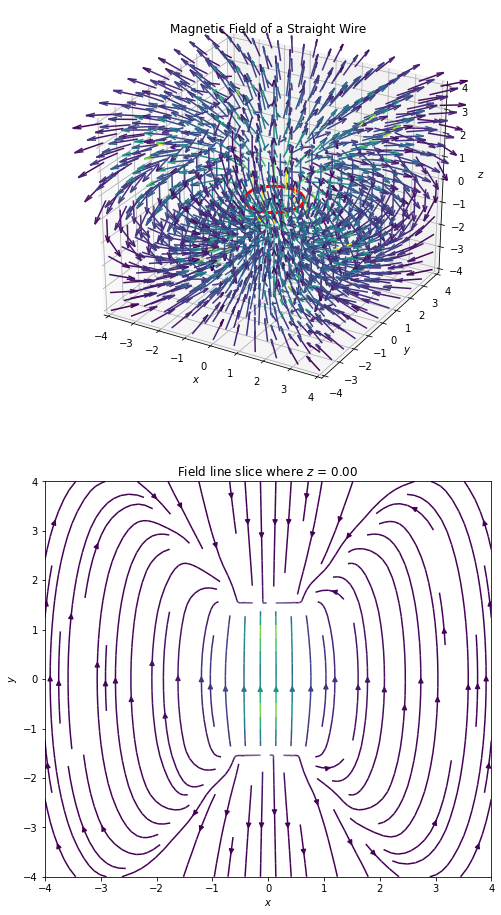

In [4]:
#Set up wire
def generateCircleXY(center, radius, res):
    theta = np.linspace(0, 2*np.pi, res)
    
    cx = np.cos(theta)*radius + center[0]
    cy = np.sin(theta)*radius + center[1]
    cz = np.zeros(res)
    
    return np.swapaxes(np.array((cx, cy, cz)), 0, 1)
        
l = generateCircleXY((0, 0), 1, 20)
I = 1 #Current in Wire

# Plot of the fields
bx, by, bz = fullMagneticField(l, I, res)

# Plot of the 3d vector field    
col = get_colors(bx, by, bz)

#Add your code for a quiver plot and a stream plot of the magnetic field here.

#/
plot(X, Y, Z, bx, by, bz, col, lims, level, "XZ")
#/